In [29]:
import pandas as pd
import acquire
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import scipy.stats as stats

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from scipy import stats

pd.options.display.float_format = '{:20,.2f}'.format

In [30]:
df = acquire.get_zillow_data()

In [31]:
df.head()

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,logerror,pid,tdate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,14297519,nan,nan,261.00,nan,nan,nan,nan,1727539,nan,...,0.03,14297519,2017-01-01,None,None,None,None,Single Family Residential,None,None
1,17052889,nan,nan,261.00,nan,nan,nan,nan,1387261,nan,...,0.06,17052889,2017-01-01,None,None,None,None,Single Family Residential,None,None
2,14186244,nan,nan,261.00,nan,nan,nan,nan,11677,nan,...,0.01,14186244,2017-01-01,None,None,None,None,Single Family Residential,None,None
3,12177905,nan,nan,261.00,2.00,nan,nan,nan,2288172,nan,...,-0.10,12177905,2017-01-01,None,None,None,Central,Single Family Residential,None,None
4,10887214,nan,nan,266.00,2.00,nan,nan,1.00,1970746,nan,...,0.01,10887214,2017-01-01,Central,None,None,Central,Condominium,None,None


In [32]:
df.nunique()

parcelid                        77381
typeconstructiontypeid              4
storytypeid                         1
propertylandusetypeid              13
heatingorsystemtypeid              10
buildingclasstypeid                 2
architecturalstyletypeid            5
airconditioningtypeid               5
id                              77381
basementsqft                       43
bathroomcnt                        22
bedroomcnt                         16
buildingqualitytypeid              12
calculatedbathnbr                  21
decktypeid                          1
finishedfloor1squarefeet         1787
calculatedfinishedsquarefeet     4972
finishedsquarefeet12             4868
finishedsquarefeet13               13
finishedsquarefeet15             1724
finishedsquarefeet50             1807
finishedsquarefeet6               350
fips                                3
fireplacecnt                        5
fullbathcnt                        13
garagecarcnt                       14
garagetotals

In [33]:
df.shape

(77381, 70)

In [34]:
df.describe()

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,id,logerror,pid
count,"77,381.00",222.00,50.00,"77,381.00","49,440.00",15.00,206.00,"24,953.00","77,381.00",50.00,...,"77,269.00","77,380.00","77,381.00","77,379.00","77,376.00","2,886.00","77,137.00","77,381.00","77,381.00","77,381.00"
mean,"13,007,150.51",6.04,7.00,261.83,3.92,3.93,7.39,1.81,"1,495,138.90",679.72,...,"189,314.53","490,134.48","2,016.00","301,095.41","5,995.53",14.09,"60,496,733,646,264.16","38,848.69",0.02,"13,007,150.51"
std,"3,481,345.65",0.56,0.00,5.14,3.59,0.26,2.73,2.97,"860,907.05",689.70,...,"230,087.42","653,443.97",0.00,"492,596.03","7,622.84",2.19,"1,535,241,981,138.57","22,402.43",0.17,"3,481,345.65"
min,"10,711,855.00",4.00,7.00,31.00,1.00,3.00,2.00,1.00,349.00,38.00,...,44.00,"1,000.00","2,016.00",161.00,19.92,3.00,"60,371,011,101,000.00",0.00,-4.66,"10,711,855.00"
25%,"11,538,305.00",6.00,7.00,261.00,2.00,4.00,7.00,1.00,"752,070.00",273.00,...,"84,265.00","207,000.00","2,016.00","85,504.00","2,715.63",14.00,"60,373,109,005,002.00","19,461.00",-0.02,"11,538,305.00"
50%,"12,531,568.00",6.00,7.00,261.00,2.00,4.00,7.00,1.00,"1,497,932.00",515.00,...,"136,499.00","358,975.50","2,016.00","203,372.00","4,450.69",15.00,"60,376,032,003,008.00","38,870.00",0.01,"12,531,568.00"
75%,"14,211,831.00",6.00,7.00,266.00,7.00,4.00,7.00,1.00,"2,240,535.00",796.50,...,"218,787.00","569,001.50","2,016.00","366,796.50","6,927.79",15.00,"60,590,423,251,008.00","58,253.00",0.04,"14,211,831.00"
max,"167,689,317.00",13.00,7.00,275.00,24.00,4.00,21.00,13.00,"2,982,274.00","3,560.00",...,"11,421,790.00","49,061,236.00","2,016.00","48,952,198.00","586,639.30",99.00,"483,030,105,084,015.00","77,613.00",5.26,"167,689,317.00"


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77381 entries, 0 to 77380
Data columns (total 70 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77381 non-null  int64  
 1   typeconstructiontypeid        222 non-null    float64
 2   storytypeid                   50 non-null     float64
 3   propertylandusetypeid         77381 non-null  float64
 4   heatingorsystemtypeid         49440 non-null  float64
 5   buildingclasstypeid           15 non-null     float64
 6   architecturalstyletypeid      206 non-null    float64
 7   airconditioningtypeid         24953 non-null  float64
 8   id                            77381 non-null  int64  
 9   basementsqft                  50 non-null     float64
 10  bathroomcnt                   77381 non-null  float64
 11  bedroomcnt                    77381 non-null  float64
 12  buildingqualitytypeid         49672 non-null  float64
 13  c

In [36]:
def missing_rows(df):
    num_rows_missing = df.isnull().sum()
    pct_rows_missing = df.isnull().sum() / (df.isnull().sum() + df.notnull().sum())
    missing_rows = pd.DataFrame({'num_rows_missing':num_rows_missing,'pct_rows_missing':pct_rows_missing})
    return missing_rows

In [37]:
nulls = missing_rows(df)
nulls

,num_rows_missing,pct_rows_missing
parcelid,0,0.00
typeconstructiontypeid,77159,1.00
storytypeid,77331,1.00
propertylandusetypeid,0,0.00
heatingorsystemtypeid,27941,0.36
buildingclasstypeid,77366,1.00
architecturalstyletypeid,77175,1.00
airconditioningtypeid,52428,0.68
id,0,0.00
basementsqft,77331,1.00


In [38]:
def missing_cols(df):
    num_cols_missing = df.isnull().sum(axis=1)
    pct_cols_missing = df.isnull().sum(axis=1) / (df.isnull().sum(axis=1) + df.notnull().sum(axis=1))
    num_rows = df.isnull().sum(axis=1).value_counts().sort_index().reset_index(drop=True)
    cols_missing = pd.DataFrame({'num_cols_missing':num_cols_missing, 'pct_cols_missing':pct_cols_missing, 'num_rows': num_rows})
    return cols_missing


In [39]:
missing_cols = missing_cols(df)
missing_cols.head()

,num_cols_missing,pct_cols_missing,num_rows
0,36,0.51,2.00
1,33,0.47,13.00
2,34,0.49,24.00
3,32,0.46,65.00
4,29,0.41,316.00


# Prepare

In [40]:
df.nunique()

parcelid                        77381
typeconstructiontypeid              4
storytypeid                         1
propertylandusetypeid              13
heatingorsystemtypeid              10
buildingclasstypeid                 2
architecturalstyletypeid            5
airconditioningtypeid               5
id                              77381
basementsqft                       43
bathroomcnt                        22
bedroomcnt                         16
buildingqualitytypeid              12
calculatedbathnbr                  21
decktypeid                          1
finishedfloor1squarefeet         1787
calculatedfinishedsquarefeet     4972
finishedsquarefeet12             4868
finishedsquarefeet13               13
finishedsquarefeet15             1724
finishedsquarefeet50             1807
finishedsquarefeet6               350
fips                                3
fireplacecnt                        5
fullbathcnt                        13
garagecarcnt                       14
garagetotals

In [41]:
df = df[df.bedroomcnt <= 6]

In [42]:
df = df[df.calculatedfinishedsquarefeet >= 700]

In [43]:
df = df[df.bathroomcnt >= 1]

In [44]:
df.shape

(74439, 70)

In [45]:
def drop_nulls(df, prop_required_column = .50, prop_required_row = .50):
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df

In [46]:
df = drop_nulls(df, prop_required_column = .70, prop_required_row = .70)

In [47]:
df.isna().sum()

parcelid                           0
propertylandusetypeid              0
id                                 0
bathroomcnt                        0
bedroomcnt                         0
calculatedbathnbr                 16
calculatedfinishedsquarefeet       0
finishedsquarefeet12            2666
fips                               0
fullbathcnt                       16
latitude                           0
longitude                          0
lotsizesquarefeet               7745
propertycountylandusecode          0
rawcensustractandblock             0
regionidcity                    1413
regionidcounty                     0
regionidzip                       44
roomcnt                            0
yearbuilt                         50
structuretaxvaluedollarcnt        82
taxvaluedollarcnt                  1
assessmentyear                     0
landtaxvaluedollarcnt              1
taxamount                          5
censustractandblock              215
id                                 0
l

In [48]:
train_and_validate, test = train_test_split(df, train_size=.8, random_state=123)
train, validate = train_test_split(train_and_validate, random_state=123)

In [49]:
cols = [
    "regionidcity",
    "regionidzip",
    "yearbuilt",
    "regionidcity",
    "censustractandblock",
    "calculatedbathnbr",
    
]

for col in cols:
    mode = int(train[col].mode())
    validate[col].fillna(value=mode, inplace=True)
    test[col].fillna(value=mode, inplace=True)

In [50]:
cols = [
    "structuretaxvaluedollarcnt",
    "taxamount",
    "taxvaluedollarcnt",
    "landtaxvaluedollarcnt",
    "structuretaxvaluedollarcnt",
    "finishedsquarefeet12",
    "calculatedfinishedsquarefeet",
    "fullbathcnt",
    "lotsizesquarefeet"
]


for col in cols:
    mean = train[col].mean()
    train[col].fillna(mean, inplace=True)
    validate[col].fillna(mean, inplace=True)
    test[col].fillna(mean, inplace=True)

In [51]:
train = train.dropna()
validate = validate.dropna()
test = test.dropna()
train.isna().sum()

parcelid                        0
propertylandusetypeid           0
id                              0
bathroomcnt                     0
bedroomcnt                      0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
id                              0
logerror                        0
pid                             0
tdate         

In [52]:
train.head()

,parcelid,propertylandusetypeid,id,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id,logerror,pid,tdate,propertylandusedesc
76179,12823362,261.00,1604954,2.00,2.00,2.00,"1,252.00","1,252.00","6,037.00",2.00,...,"359,831.00","2,016.00","225,713.00","4,464.95","60,375,034,023,015.00",76412,-0.03,12823362,2017-09-14,Single Family Residential
29625,12136445,261.00,2317617,3.00,2.00,3.00,"1,974.00","1,974.00","6,037.00",3.00,...,"539,174.00","2,016.00","279,801.00","6,407.08","60,374,307,011,000.00",29776,0.01,12136445,2017-04-26,Single Family Residential
21243,12429935,261.00,469810,2.00,4.00,2.00,"1,714.00","1,714.00","6,037.00",2.00,...,"588,844.00","2,016.00","401,531.00","7,248.10","60,375,710,006,008.00",21367,0.00,12429935,2017-03-29,Single Family Residential
64283,10784558,261.00,1997980,4.00,4.00,4.00,"2,092.00","2,092.00","6,037.00",4.00,...,"610,265.00","2,016.00","357,282.00","7,409.83","60,371,325,011,004.00",64507,0.04,10784558,2017-08-08,Single Family Residential
69240,12135388,261.00,662519,1.00,2.00,1.00,"1,165.00","1,165.00","6,037.00",1.00,...,"964,487.00","2,016.00","771,590.00","11,074.17","60,374,304,004,009.00",69469,-0.49,12135388,2017-08-23,Single Family Residential


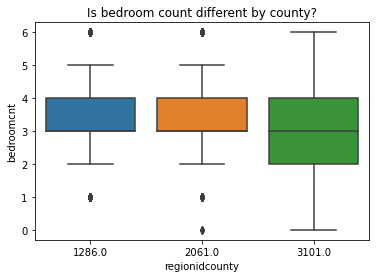

In [53]:
sns.boxplot(train.regionidcounty, train.bedroomcnt)
plt.title("Is bedroom count different by county?")
plt.show()

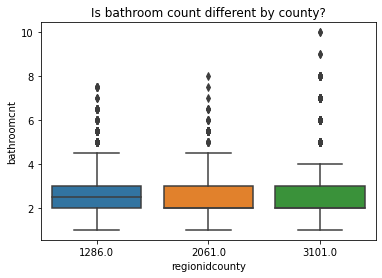

In [54]:
sns.boxplot(train.regionidcounty, train.bathroomcnt)
plt.title("Is bathroom count different by county?")
plt.show()

## 2 Sample T-Test:
Question - Is there a difference in log error between houses with less than 3 bedrooms and houses with more than 3 bedrooms?

H0: There is no log error difference between houses with less than 3 bedrooms than houses with more than 3 bedrooms

Ha: There is a log error difference between houses with less than 3 bedrooms than houses with more than 3 bedrooms

In [58]:
less_than_3 = train[train.bedroomcnt < 3]
more_than_3 = train[train.bedroomcnt >= 3]
stats.levene(less_than_3.logerror, more_than_3.logerror)

LeveneResult(statistic=8.931937863702624, pvalue=0.0028040802321110062)

In [60]:
stats.ttest_ind(less_than_3.logerror, more_than_3.logerror,equal_var=False)

Ttest_indResult(statistic=-5.005370034160358, pvalue=5.628806917397039e-07)

## Takeaways:
- We will reject the null hypothesis because there is a significant variance between the two
- After performing the 2 sample t test, there is a significant difference in average log error between the two bedroom sizes

## Assess Variance For Square Footage

In [63]:
less_than_3000 = train[train.calculatedfinishedsquarefeet < 3000]
more_than_3000 = train[train.calculatedfinishedsquarefeet >= 3000]
stats.levene(less_than_1500.logerror, more_than_1500.logerror)

LeveneResult(statistic=0.2699349368313742, pvalue=0.6033784810905605)

## Takeaways:
There is a significant variance, no need to continue assessing further